In [ ]:
#https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
#https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html
#https://docs.opencv.org/master/df/d0c/tutorial_py_fast.html

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def muestra(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]),plt.yticks([]) #Ocultar ejes
    plt.show()

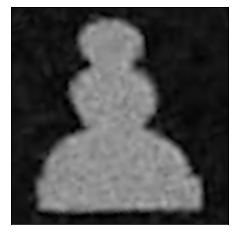

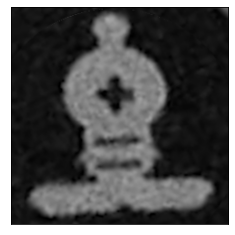

In [19]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco1Rotado2.png"), cv2.COLOR_BGR2GRAY)
peon = cv2.imread("./imagenes/fichas/clases/6.png")   
alfil =cv2.imread("./imagenes/fichas/clases/2.png")   
muestra(peon)
muestra(alfil)

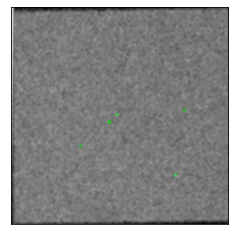

In [12]:
# Initiate ORB detector
orb = cv2.ORB_create(edgeThreshold=100)
# compute the descriptors with ORB
kp, des = orb.detectAndCompute(img, None)
# draw only keypoints location,not size and orientation
muestra(cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0))

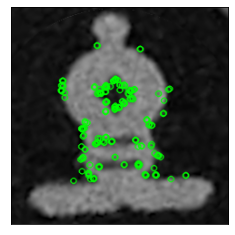

In [13]:
# Initiate ORB detector
orb = cv2.ORB_create()
# compute the descriptors with ORB
kpA, desA = orb.detectAndCompute(alfil, None)
# draw only keypoints location,not size and orientation
muestra(cv2.drawKeypoints(alfil, kpA, None, color=(0,255,0), flags=0))

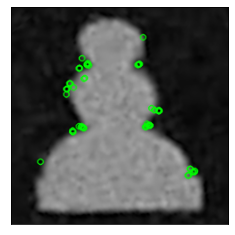

In [17]:
# Initiate ORB detector
orb = cv2.ORB_create()
# compute the descriptors with ORB
kpP, desP = orb.detectAndCompute(peon, None)
# draw only keypoints location,not size and orientation
muestra(cv2.drawKeypoints(peon, kpP, None, color=(0,255,0), flags=0))

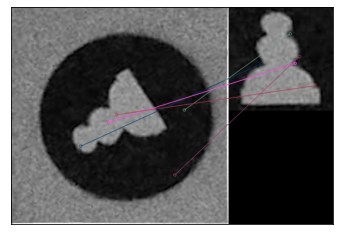

85.33333333333333

In [20]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,desP)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 20 matches.
img3 = cv2.drawMatches(img,kp,peon,kpP,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
muestra(img3)
distanciaMedia(matches)

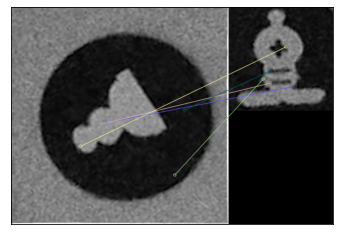

76.4

In [21]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,desA)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 20 matches.
img4 = cv2.drawMatches(img,kp,alfil,kpA,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
muestra(img4)
distanciaMedia(matches)

In [4]:
def circle_of(img, p):
    i,j = p
    return [img[i-3,j-1],img[i-3,j],img[i-3,j+1],
            img[i-2,j+2],
            img[i-1,j+3],img[i,j+3],img[i+1,j+3],
            img[i+2,j+2],
            img[i+3,j+1],img[i+3,j],img[i+3,j-1],
            img[i+2,j-2],
            img[i-1,j-3],img[i,j-3],img[i+1,j-3],
            img[i-2,j-2]]

def n_contiguous(l, I, threshold, n):
    mapped = list(map(lambda Ip: abs(int(I) - int(Ip)) > threshold, l))
#    mapped = list(map(lambda e: e==1, l))
    if False in mapped:
        n_start = mapped.index(False) # Numero de elementos que cumplen la condicion al principio de la lista
        i = n_start
        count=1
        while(i<len(l) and count<n):
            if mapped[i]:
                count += 1
            else:
                count = 1
                
            i+=1
        return count >= n or count+n_start >= n
        
    else: 
        return True
    

def key_points(img, threshold, n=12):
    # Implementacion de algoritmo FAST https://docs.opencv.org/master/df/d0c/tutorial_py_fast.html
    res = []
    for i in range(3, img.shape[0]-3):
        for j in range(3, img.shape[1]-3):
            I = img[i,j]
            circle = circle_of(img, (i,j))
            if n_contiguous(circle, I, threshold, n):
                res.append([[j,i]])
                
    #print(res)
    return np.array(res,dtype='int64')
            
            
            
        

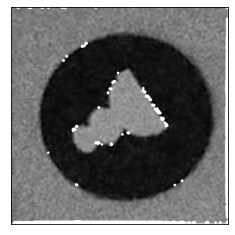

NameError: name 'kp' is not defined

In [5]:
import copy 
img2 = copy.deepcopy(img)

corners = key_points(img2, 50, n=6)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img2,(x,y),3,255,-1)
muestra(img2)
muestra(cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0))

In [7]:
clases = []
for i in range(1,13):
    c = cv2.imread("./imagenes/fichas/clases/"+str(i)+".png")   
    clases.append(c) 

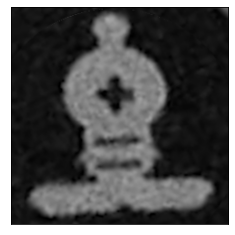

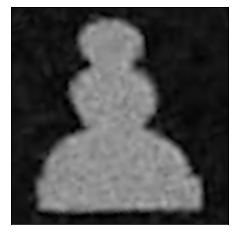

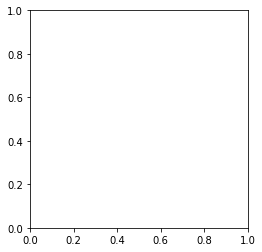

In [8]:
for c in clases:
    try: 
        muestra(c)
    except:
        pass

In [9]:
descriptores = []
# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
for f in clases:
    if type(f) is np.ndarray: # Solo para pruebas
        descriptores.append(orb.detectAndCompute(f, None)[1])
    else:
        descriptores.append(None)
        
del orb



In [10]:
def distanciaMedia(matches):
    return sum(map(lambda m: m.distance,matches)) / len(matches)

def clasifica(img):
    # Initiate ORB detector
    orb = cv2.ORB_create()
    # compute the descriptors with ORB
    kpO, desO = orb.detectAndCompute(img, None)
    # draw only keypoints location,not size and orientation
   
    best = 70
    best_clase = 0
    for i,des in enumerate(descriptores, start=1):
        if type(des) is np.ndarray : # Solo para pruebas
            # Match descriptors.
            matches = bf.match(desO,des)
            # Sort them in the order of their distance.
            matches = sorted(matches, key = lambda x:x.distance)

            #if len(matches)> 20: # 50?
            media = distanciaMedia(matches[:30]) # solo cuentan los 30 mejores
            if media < best:
                best = media
                best_clase = i
    return best, best_clase

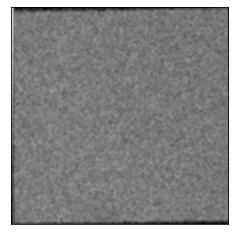

NameError: name 'bf' is not defined

In [11]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/vacia.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)

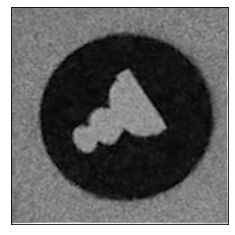

(30.833333333333332, 6)

In [30]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco1Rotado2.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)

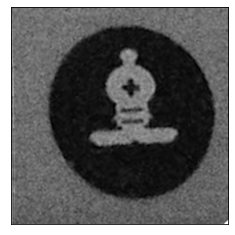

(0.0, 2)

In [31]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/AlfilBlanco.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)

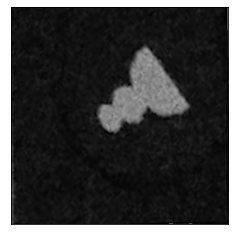

(55.13636363636363, 6)

In [32]:
img = cv2.cvtColor(cv2.imread("./imagenes/fichas/PeonBlanco2Rotado.png"), cv2.COLOR_BGR2GRAY)
muestra(img)
clasifica(img)